In [393]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
#import tensorflow 
#import fancyimpute
#import msg
from scipy.stats import chi2_contingency
import seaborn as sns
#from fancyimpute import KNN
import matplotlib.pyplot as plt

In [394]:
data=pd.read_csv("diabetes.csv")

In [395]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [396]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [397]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [398]:
cnames=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [399]:
cnames

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [400]:
for i in cnames:
    print(i)
    q75, q25=np.percentile(data.loc[:,i],[75,25])
    iqr=q75-q25
    
    min=q25-(iqr*1.5)
    max=q75+(iqr*1.5)
    
    print(min)
    print(max)
    
    data=data.drop(data[data.loc[:,i]<min].index)
    data=data.drop(data[data.loc[:,i]>max].index)
    

Pregnancies
-6.5
13.5
Glucose
37.5
201.5
BloodPressure
35.0
107.0
SkinThickness
-49.5
82.5
Insulin
-198.0
330.0
BMI
13.799999999999988
49.600000000000016
DiabetesPedigreeFunction
-0.31225
1.17375
Age
-0.75
65.25


In [401]:
df_corr = data.loc[:,cnames]
df_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
10,4,110,92,0,0,37.6,0.191,30
11,10,168,74,0,0,38.0,0.537,34
14,5,166,72,19,175,25.8,0.587,51
16,0,118,84,47,230,45.8,0.551,31


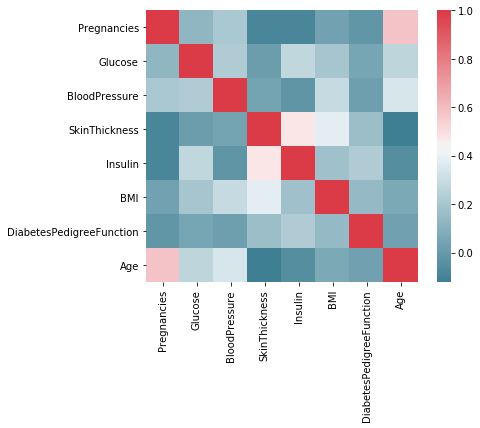

In [402]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [403]:
# #Standarisation
for i in cnames:
    print(i)
    data[i] = (data[i] - data[i].mean())/data[i].std()

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age


In [404]:
#for i in cnames:
 #   print(i)
  #  data[i]=(data[i]-min*(data[i]))/(max*(data[i])-min*(data[i]))

In [405]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.680890,1.004612,-0.000696,0.935859,-0.825547,0.256237,0.819146,1.603426,1
1,-0.856915,-1.168044,-0.531617,0.541944,-0.825547,-0.840232,-0.306982,-0.142928,0
2,1.296012,2.211643,-0.708591,-1.361982,-0.825547,-1.357138,1.002754,-0.051015,1
3,-0.856915,-1.030097,-0.531617,0.148028,0.298830,-0.605274,-1.057733,-1.062062,0
5,0.373329,-0.098959,0.176278,-1.361982,-0.825547,-0.996870,-0.919008,-0.234842,0


In [406]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [407]:
#Impute with median
#data['Pregnancies'] = data['Pregnancies'].fillna(data['Pregnancies'].median())
#data['SkinThickness'] = data['SkinThickness'].fillna(data['SkinThickness'].median())
#data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median())

In [408]:
#Import Libraries for decision tree
from sklearn import tree
import sklearn
from sklearn.metrics import accuracy_score
#import sklearn.cross_validation 
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [409]:
#Divide data into train and test
X = data.values[:, 0:8]
Y = data.values[:,8]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [410]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 20).fit(X_train, y_train)
RF_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [411]:
RF_Predictions = RF_model.predict(X_test)
RF_Predictions

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [412]:
import sklearn.metrics
from sklearn.metrics import confusion_matrix 
CM =pd.crosstab(y_test, RF_Predictions)


In [413]:
CM

col_0,0.0,1.0
row_0,,
0.0,82,6
1.0,14,26


In [414]:
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [415]:
((TP+TN)*100)/(TP+TN+FP+FN)

84.375